# Optimal growth of disturbances

In the previous notebook we looked at the eigenvalues and eigenvectors of the Orr-Sommerfeld equations, and used these to determine whether a disturbance is unstable or not. For example, in the case of Poiseuille flow, we found that the disturbance is unstable for sufficiently large Reynolds number. Instability corresponds to monotonic exponential growth.

However, this is not the end of the story, because it turns out that only modest exponential growth is possible for the flows we looked at. Suppose we don't constrain ourselves to searching for monotonic growth of energy. What if the energy grows first, and then decays? Is that possible? And might we get more disturbance energy growth this way?

The answer to both of these questions is **yes**, and it is due to algebraic (usually called *transient*) growth.

In [1]:
using OrrSommerfeld
using Plots

[ Info: Precompiling OrrSommerfeld [8551611f-1dc7-4e24-8ab0-98b07f8d6847]


Let's start with the same problem we looked at in the previous notebook.  We will purposefully look at the case that we knew was exponentially stable.

In [2]:
Re = 5000
α, β = 1.0, 0.0

dOS = os_matrices(α,β,Re,baseflow=:poiseuille);
eOS = os_eigen(dOS,ilims=(-1.5,Inf),normalize=:true);

Let's plot the energy of the *least stable* mode (the Tollmein-Schlichting mode, the first eigenvalue/eigenvector):

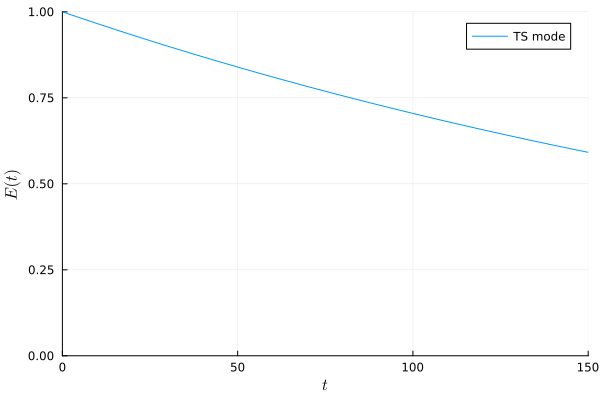

In [3]:
κ0 = zeros(ComplexF64,length(eOS.values));
κ0[1] = 1.0

tmin, tmax = 0.0, 150.0
tr = range(tmin,tmax,length=100)
E = disturbance_energy(κ0,dOS,eOS,tr);
plot(tr,E,xlim=(0,Inf),ylim=(0,Inf),label="TS mode",xlabel="\$t\$",ylabel="\$E(t)\$")

As expected, it decays over time.

Now, let's call a function called `optimal_growth`, which looks for the *combination* of modes that achieves the largest energy amplification over the same time interval we just plotted. 

In [4]:
opt = optimal_growth(dOS,(tmin,tmax));

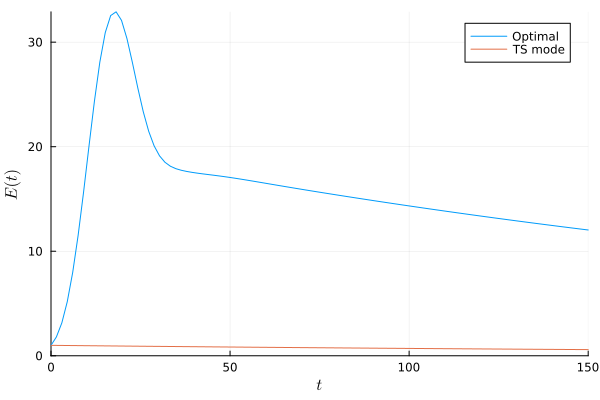

In [5]:
plot(opt.t,opt.G,xlim=(0,Inf),ylim=(0,Inf),xlabel="\$t\$",ylabel="\$E(t)\$",label="Optimal")
plot!(opt.t,E,label="TS mode")

This is unexpected! The energy grows to over 30 times the value of the initial disturbance before it finally starts to decay. This is what transient growth looks like. The initial rise in energy is algebraic, not exponential.

Let's look at what the optimal initial disturbance looks like. We will plot its x velocity component across the channel:

In [71]:
x, y, u = velocity_x(opt.flow0,dOS);

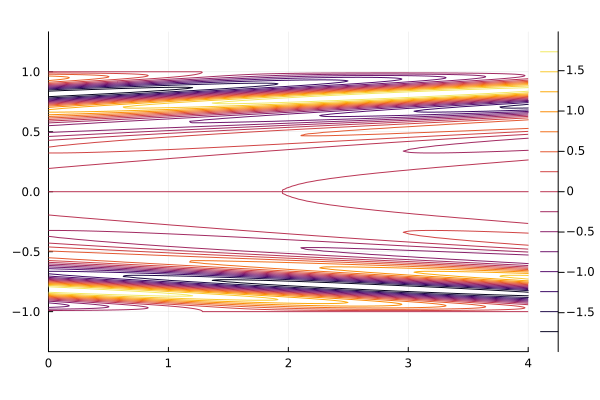

In [72]:
plot(x, y, u, ratio=1)

And now let's look at the x velocity component at the moment of peak energy

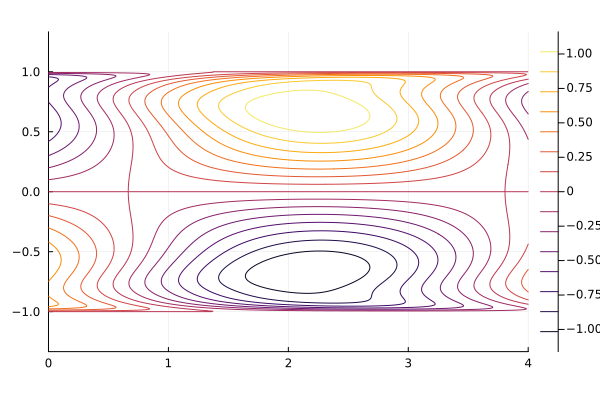

In [44]:
x, y, u = velocity_x(opt.flowt,dOS);
plot(x, y, u, ratio=1)

It looks a lot different at this instant, because of the different ways that the constituent modes have decayed over time.

It is easiest to show this evolution from initial disturbance to peak disturbance as a movie

[ Info: Saved animation to /Users/jeff/JuliaProjects/OrrSommerfeld/notebooks/tmp.gif


Plots.AnimatedGif("/Users/jeff/JuliaProjects/OrrSommerfeld/notebooks/tmp.gif")
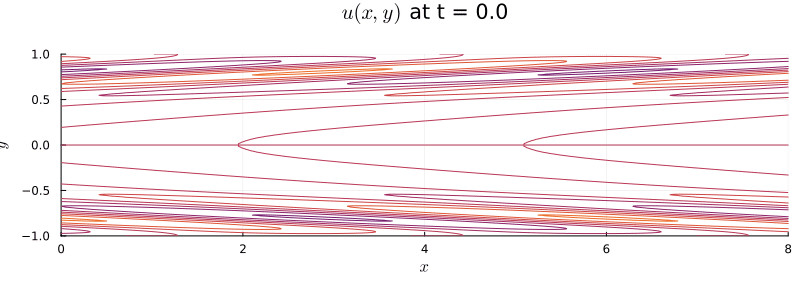

In [24]:
tr = range(0,40,length=50)[1:end-1]
@gif for t in tr
    x, y, u = velocity_x(opt.κ0,dOS,eOS,t,glims=(0,8),plane=:xy);
    plot(x, y, u, ratio=1, ylims=(-1,1),xlabel="\$x\$",ylabel="\$y\$",title="\$u(x,y)\$ at t = "*string(round(t,digits=2)),levels=range(-4.5,4.5,length=21),clim=(-4,4),legend=:false,size=(800,300))
end fps = 10

This movie shows a few things:
- the growth in amplitude is apparent here in the x velocity component.
- it also clearly the fact that different modes of the disturbance have different speeds of travel. This is called *dispersion*.

## Questions to address
- Try a different value of the spanwise wavenumber, $\beta$ (say, 1) and $\alpha$ (0). How does its optimal growth curve compare with the optimal growth for $\alpha = 1$ and $\beta = 0$? For this case, try a smaller Reynolds number, say 1000.
- Make plots or movies of other quantities (e.g., spanwise velocity in the y-z plane, vorticity components) to visualize how this component of the flow emerges in transient growth.
- What does optimal growth look like for a Reynolds number that is exponentially unstable or neutrally stable?
- Try the same things for Couette flow.